# Validação Cruzada

A validação cruzada é uma técnica estatística utilizada para avaliar a capacidade de generalização de um modelo, testando sua performance em diferentes subconjuntos dos dados disponíveis. Ela é especialmente útil para evitar o sobreajuste (overfitting), onde o modelo pode se ajustar muito bem aos dados de treino, mas falhar em novos dados.

O processo básico de validação cruzada envolve dividir o conjunto de dados em várias partes (ou "folds"). Um dos folds é usado para teste e os outros para treino, repetindo esse processo até que cada fold tenha sido usado para teste pelo menos uma vez. Uma forma comum é a validação cruzada k-fold, onde os dados são divididos em k partes.

---

1.   Reserve 1/k dos dados como amostra de retenção
2.  Treine o modelo nos dados restantes
3.  Aplique (score) o modelo na retenção de 1/k e registre as métricas de avaliação de modelo necessárias
4.  Recoloque os primeiros 1/k dos dados e reserve os 1/k seguintes (excluindo quaisquer registros que foram escolhidos na primeira vez).
5.  Repita os Passos 2 e 3
6.  Repita até que cada registro tenha sido usado na porção de retenção
7.  Tire a média ou combine as métricas de avaliação do modelo de outra forma

In [2]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
import numpy as np

# Gerar um conjunto de dados sintético
X, y = make_regression(n_samples=100, n_features=2, noise=0.1)

# Definir o modelo
model = LinearRegression()

# Definir o número de folds
k = 5
kf = KFold(n_splits=k)

# Lista para armazenar as métricas de avaliação
mse_scores = []

# Loop pelos k folds
for train_index, test_index in kf.split(X):
    # Separar dados de treino e teste
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Treinar o modelo nos dados de treino
    model.fit(X_train, y_train)
    
    # Fazer previsões nos dados de teste (retenção)
    y_pred = model.predict(X_test)
    
    # Calcular e registrar a métrica (MSE - Mean Squared Error)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Calcular a média dos erros quadráticos médios
mean_mse = np.mean(mse_scores)

# Exibir o resultado
print(f"Métricas MSE por fold: {mse_scores}")
print(f"Média das métricas MSE: {mean_mse}")


Métricas MSE por fold: [0.011694183792434597, 0.01009086823532846, 0.010401074849479514, 0.006676328936223122, 0.00857505402904445]
Média das métricas MSE: 0.009487501968502027


## Chart

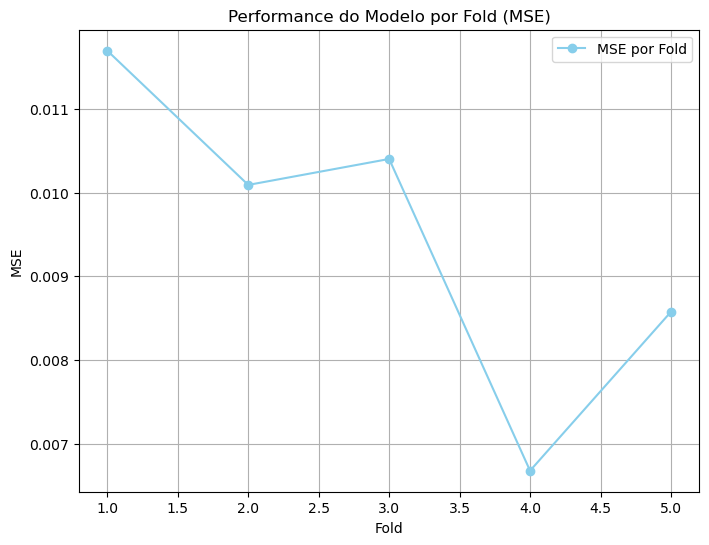

In [4]:
import matplotlib.pyplot as plt

# Gráfico de performance por fold (linha)
folds = list(range(1, k+1))

plt.figure(figsize=(8, 6))
plt.plot(folds, mse_scores, marker='o', linestyle='-', color='skyblue', label='MSE por Fold')

# Adicionar títulos e rótulos
plt.title('Performance do Modelo por Fold (MSE)')
plt.xlabel('Fold')
plt.ylabel('MSE')

# Adicionar grade e legenda
plt.grid(True)
plt.legend()

# Exibir o gráfico
plt.show()
